In [1]:
import sys
sys.path.insert(0, r'C:\Users\Kinga\Desktop\MAGISTERKA\Geometric-Properties-of-Graph-Visualization-Methods\code')
from clustering_script import *
from graph_generating_script import *

from clus_num_methods import *
import random
import numpy as np

random.seed(212)
np.random.seed(212)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
wake_up_and_its_over = ['#62B8CE','#885B59','#892203','#E5510D','#605E04']
mammalian_sighting_reflex = ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D', '#FCFCFC']

# Set the custom palette in Seaborn
sns.set_palette(mammalian_sighting_reflex)

# Set the custom palette in Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=mammalian_sighting_reflex)


# Combine all

In [3]:
import os
import pandas as pd

#@ adding bestnum_algo names as a column to the results files
# Define the input and output directories
input_dir = 'clus_num_data'
output_dir = 'clus_num_data'

files = [f for f in os.listdir(input_dir) if f.endswith('_results.csv')]

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)
    name_part = file.split('_')[1]
    if name_part =='ch':
        name_part = 'calinski_harabasz'
    if name_part == 'gap':
        name_part = 'gap_statistic'
    if name_part == '50':
        name_part = 'mix_50ch_50elbow'
    if name_part == '75':
        name_part = 'mix_75ch_25elbow'

    df['bestnum_algo'] = name_part
    output_file_path = os.path.join(output_dir, file)
    df.to_csv(output_file_path, index=False)

print("Files processed and saved successfully.")

Files processed and saved successfully.


In [4]:
df_all_results = pd.DataFrame()
input_dir = 'clus_num_data'
files = [f for f in os.listdir(input_dir) if f.endswith('_results.csv')]

for file in files:
    file_path = os.path.join(input_dir, file)
    df = pd.read_csv(file_path)
    df_all_results = pd.concat([df_all_results, df])

In [5]:
df_all_results['diff'] = df_all_results['calculated_bestnum'] - df_all_results['no_communities']
df_all_results['abs_diff'] = abs(df_all_results['diff'])

In [9]:
from datetime import datetime
version = 'v' + datetime.today().strftime('%Y%m%d')
df_all_results.to_csv(f'clus_num_data/all_results_clus_num_{version}.csv', index=False)

# Read and Plot

In [25]:
df_all_results = pd.read_csv(r'clus_num_data\all_results_clus_num_v20250208.csv')
df_all_results.head()

,graph_id,assortativity,layout_name,no_communities,calculated_bestnum,size,bestnum_algo,diff,abs_diff
0,0,0.948207,kamada_kawai,2,3,100.0,mix_50ch_50elbow,1,1
1,0,0.948207,spring,2,4,100.0,mix_50ch_50elbow,2,2
2,0,0.948207,davidson_harel,2,3,100.0,mix_50ch_50elbow,1,1
3,0,0.948207,drl,2,4,100.0,mix_50ch_50elbow,2,2
4,0,0.948207,fruchterman_reingold,2,4,100.0,mix_50ch_50elbow,2,2


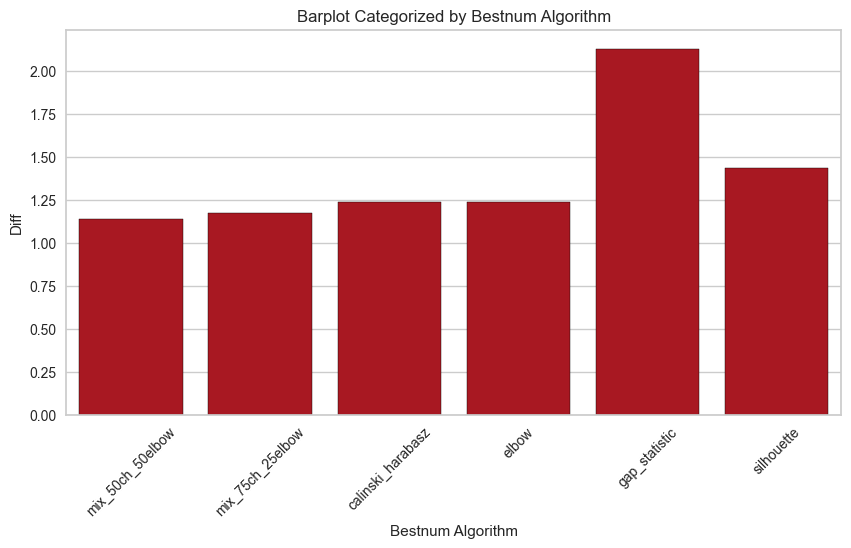

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x='bestnum_algo', y='abs_diff', data=df_all_results,estimator=np.mean, ci=False, edgecolor='black')

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Diff')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

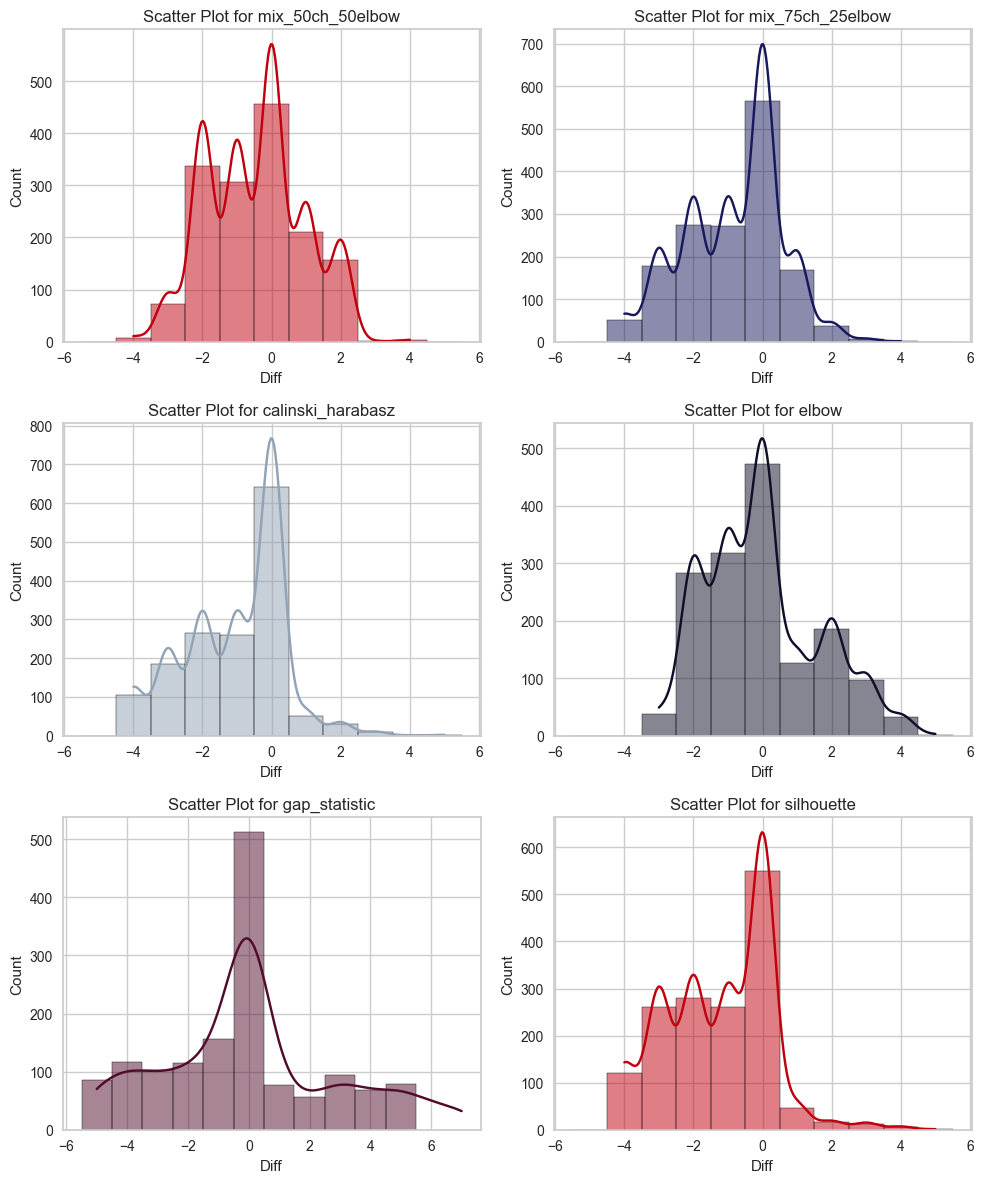

In [14]:
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()

# Define the bin edges
bin_edges = [-5.5,-4.5,-3.5,-2.5,-1.5,-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    sns.histplot(data=subset, x='diff', bins=bin_edges, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Diff')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

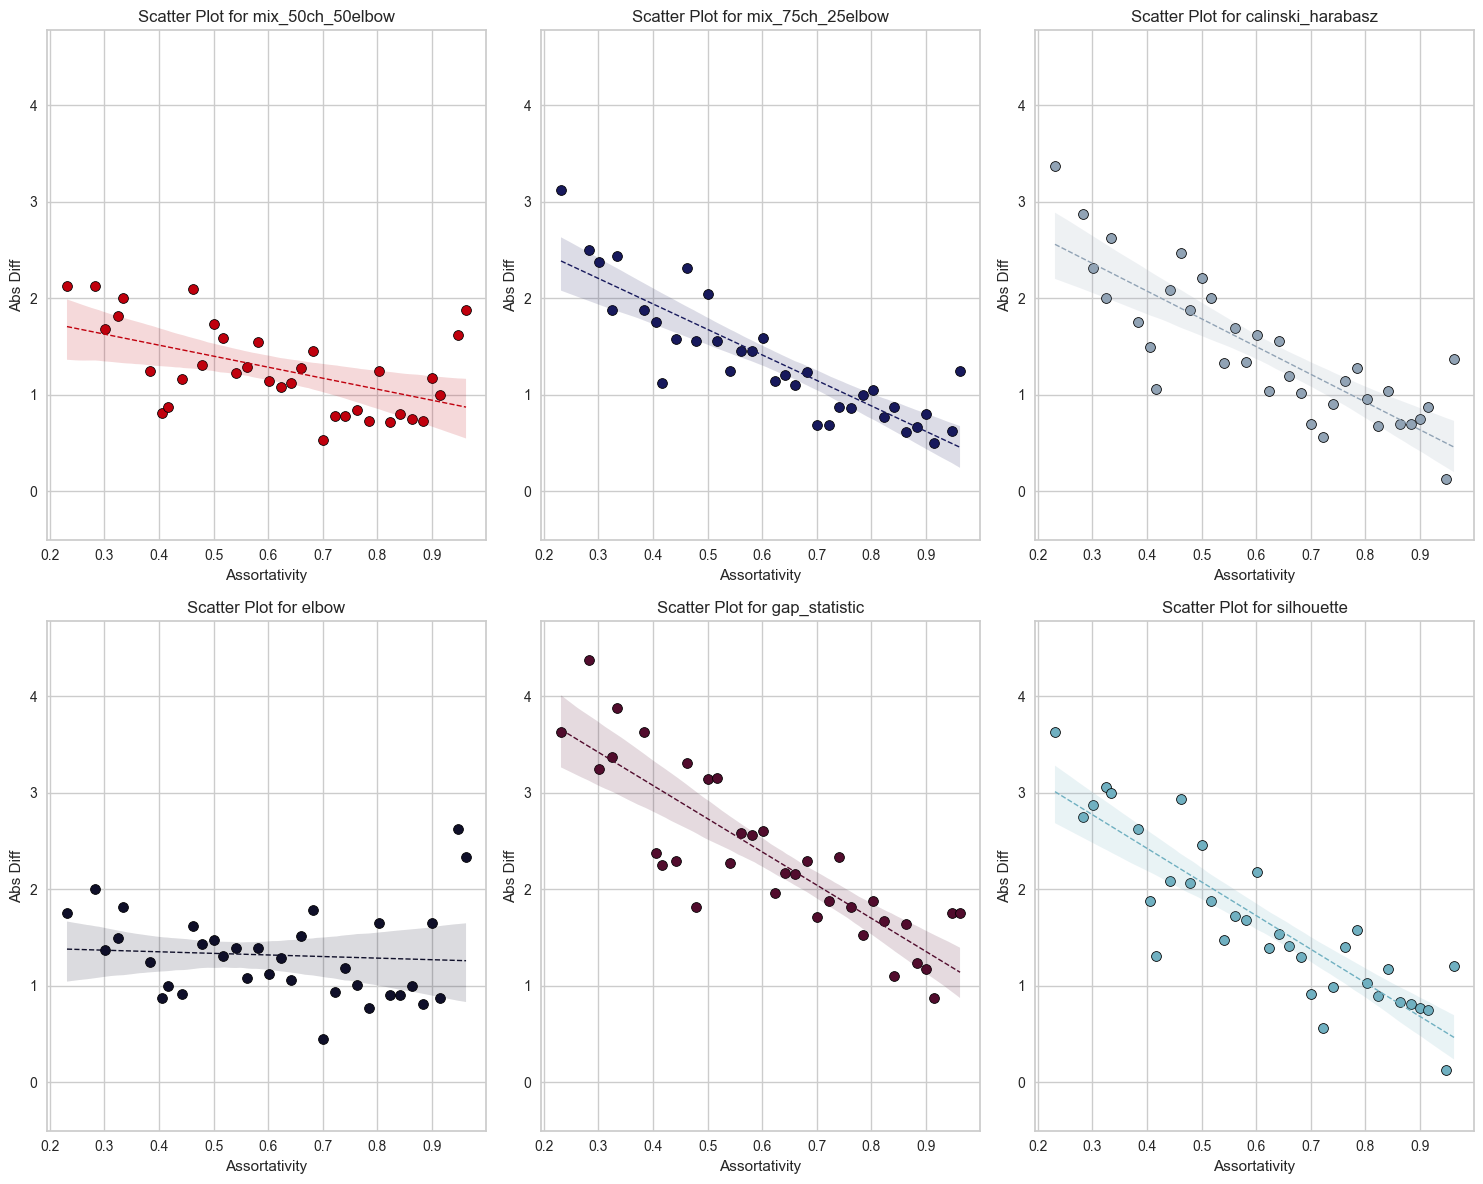

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex[:5]+['#70B0C1']))
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['assortativity'].min(), df_all_results['assortativity'].max() + 0.02, 0.02)
y_min, y_max = float('inf'), float('-inf')

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('assortativity_bin').agg({'assortativity': 'mean', 'abs_diff': 'mean'}).reset_index()
    y_min = -0.5
    y_max = max(y_max, binned_data['abs_diff'].max())+.2
    sns.scatterplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    sns.regplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, scatter=False, color=palette_dict[algo], line_kws={"linestyle": "--", "linewidth": 1})
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Abs Diff')

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

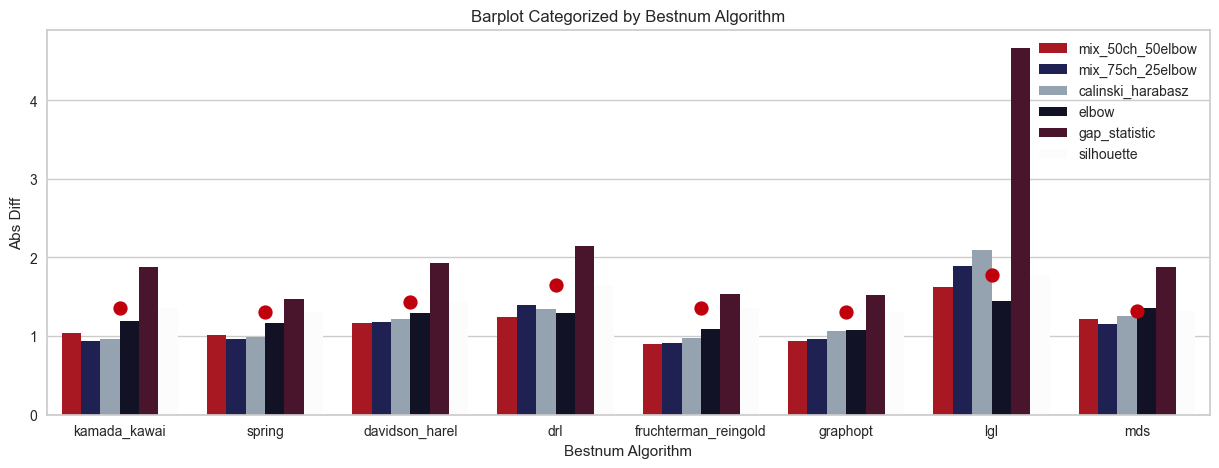

In [19]:
#I think this doesnt really say much
plt.figure(figsize=(15, 5))
# subset = df_all_results[df_all_results['assortativity'] >=.6]
sns.barplot(x='layout_name', y='abs_diff', hue='bestnum_algo', data=df_all_results, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
sns.pointplot(x='layout_name', y='abs_diff', data=general_avg, color=mammalian_sighting_reflex[0], markers='o', linestyles='')
# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

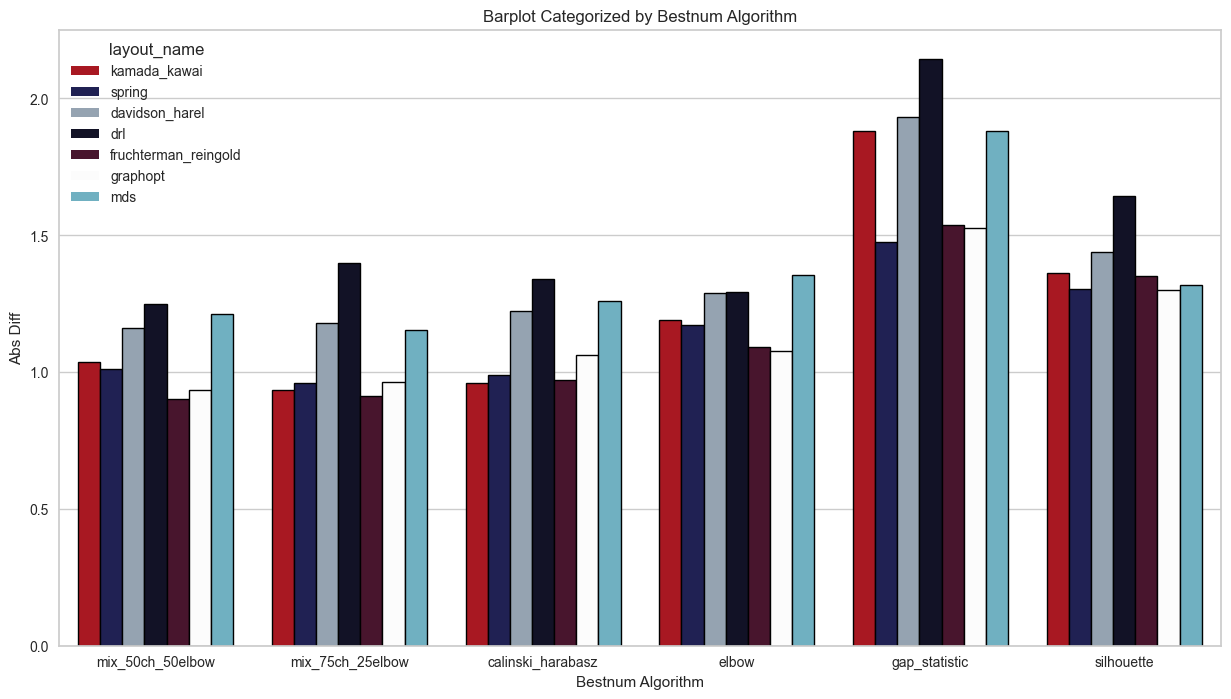

In [20]:
# plot to see which layout combo with alorithm works best
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='bestnum_algo', y='abs_diff', hue='layout_name', data=df_all_results[df_all_results['layout_name'] != 'lgl'], estimator=np.mean, palette=mammalian_sighting_reflex+wake_up_and_its_over, ci=None)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

# IMPORTANT STEP

# Filtered out optimal layouts

In [26]:
# zczytane z wykresu powyzej
best_layout_for_method = {
    'mix_50ch_50elbow' : 'fruchterman_reingold',
    'mix_75ch_25elbow': 'fruchterman_reingold',
    'calinski_harabasz': 'kamada_kawai',
    'elbow' : 'graphopt',
    'gap_statistic': 'spring',
    'silhouette' : 'spring'}

filtered_df = pd.DataFrame()

# Iterate over the dictionary and filter the DataFrame
for algo, layout in best_layout_for_method.items():
    filtered_subset = df_all_results[(df_all_results['bestnum_algo'] == algo) & (df_all_results['layout_name'] == layout)]
    filtered_df = pd.concat([filtered_df, filtered_subset], ignore_index=True)

# Display the filtered DataFrame
filtered_df.head()

,graph_id,assortativity,layout_name,no_communities,calculated_bestnum,size,bestnum_algo,diff,abs_diff
0,0,0.948207,fruchterman_reingold,2,4,100.0,mix_50ch_50elbow,2,2
1,1,0.860640,fruchterman_reingold,2,3,100.0,mix_50ch_50elbow,1,1
2,2,0.804194,fruchterman_reingold,2,3,100.0,mix_50ch_50elbow,1,1
3,3,0.675292,fruchterman_reingold,2,3,100.0,mix_50ch_50elbow,1,1
4,4,0.556041,fruchterman_reingold,2,3,100.0,mix_50ch_50elbow,1,1


In [27]:
df_all_results = filtered_df.copy(deep=True)

## plots cd

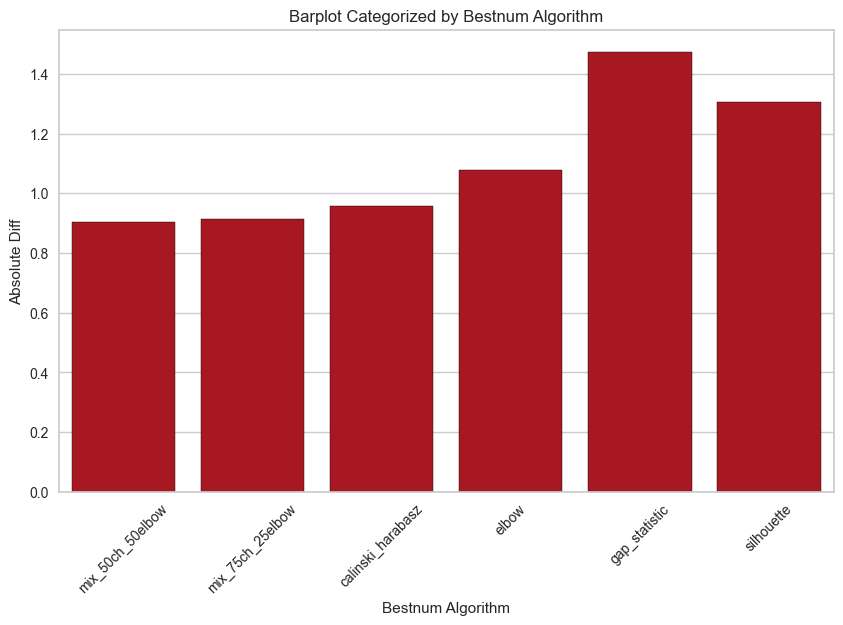

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bestnum_algo', y='abs_diff', data=df_all_results, estimator=np.mean, ci=False, edgecolor='black')

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Absolute Diff')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

Text(0, 0.5, 'abs diff')

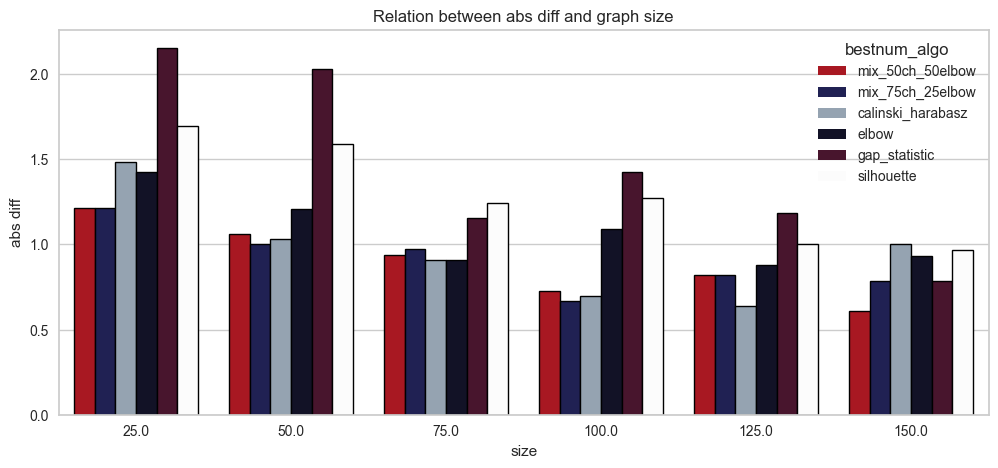

In [29]:
# plt.figure(figsize=(10, 4))
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# subset = df_all_results[df_all_results['size'] <100]
plt.figure(figsize=(12, 5))
ax=sns.barplot(x='size', y='abs_diff', hue='bestnum_algo', data=df_all_results, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
# general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

# sns.pointplot(x='no_communities', y='abs_diff', data=general_avg, color=mammalian_sighting_reflex[0], markers='o', linestyles='', ax=ax1)
# Customize the plot
ax.set_title('Relation between abs diff and graph size')
# ax.set_ylim(0, 5)

# plt.xlabel('Bestnum Algorithm')
plt.ylabel('abs diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed


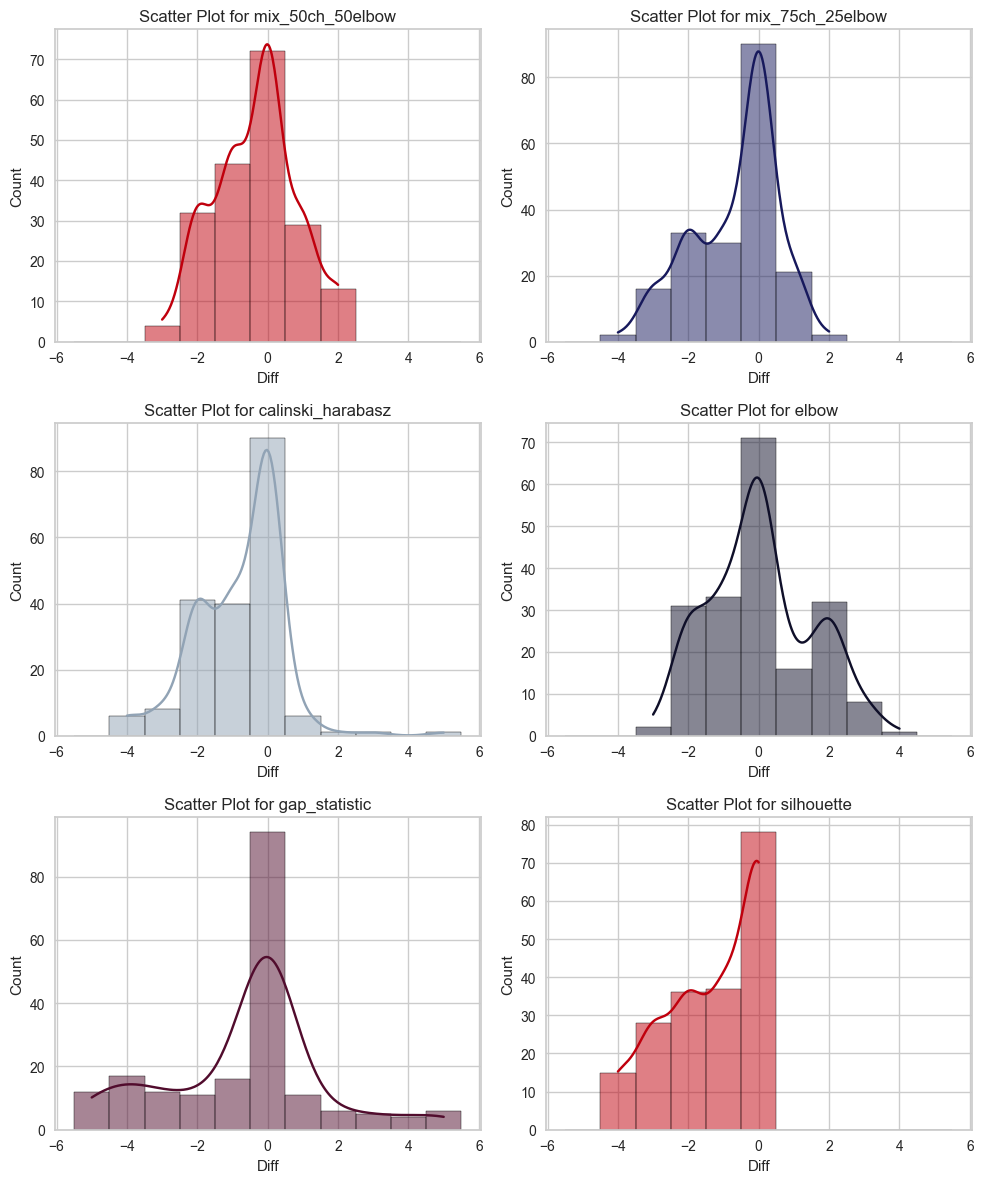

In [30]:
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()

# Define the bin edges
bin_edges = [-5.5,-4.5,-3.5,-2.5,-1.5,-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    sns.histplot(data=subset, x='diff', bins=bin_edges, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Diff')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

In [33]:
# palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))
# fig, axes = plt.subplots(3, 2, figsize=(8, 10))
# axes = axes.flatten()
# unique_algos = df_all_results['bestnum_algo'].unique()

# # Iterate over each subplot and unique bestnum_algo
# for ax, algo in zip(axes, unique_algos):
#     # Filter data for the current bestnum_algo
#     subset = df_all_results[df_all_results['bestnum_algo'] == algo]
#     sns.histplot(data=subset, x='diff', bins=10, kde=True, ax=ax, color=palette_dict[algo])
#     # Customize the subplot
#     ax.set_title(f'Differene distribution {algo}')
#     ax.set_xlabel('Diff')
#     # ax.set_ylabel('Abs Diff')

# plt.tight_layout()
# plt.show()

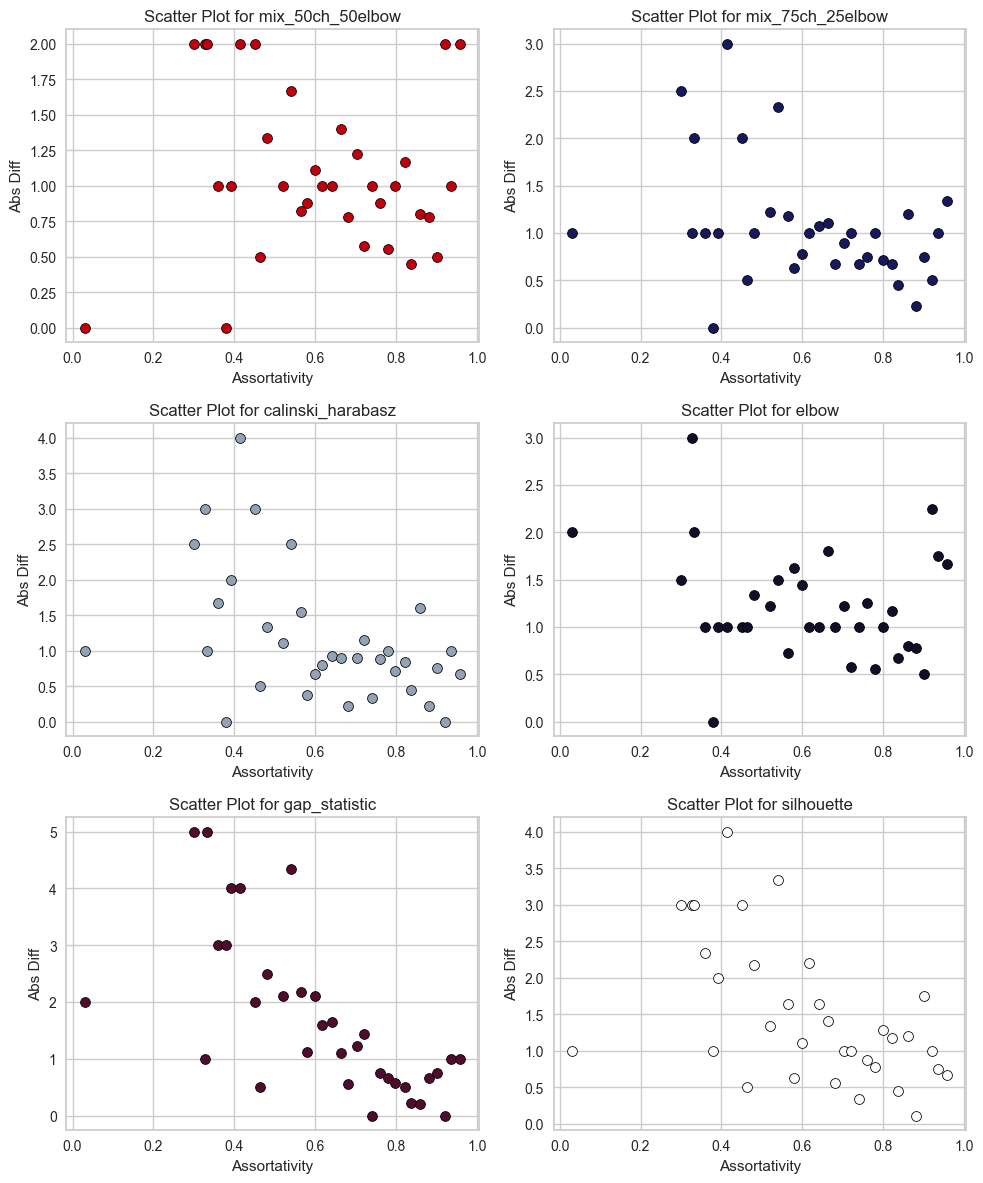

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'assortativity', and 'abs_diff' columns

# Define the custom palette
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex))
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['assortativity'].min(), df_all_results['assortativity'].max() + 0.02, 0.02)

for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('assortativity_bin').agg({'assortativity': 'mean', 'abs_diff': 'mean'}).reset_index()
    sns.scatterplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

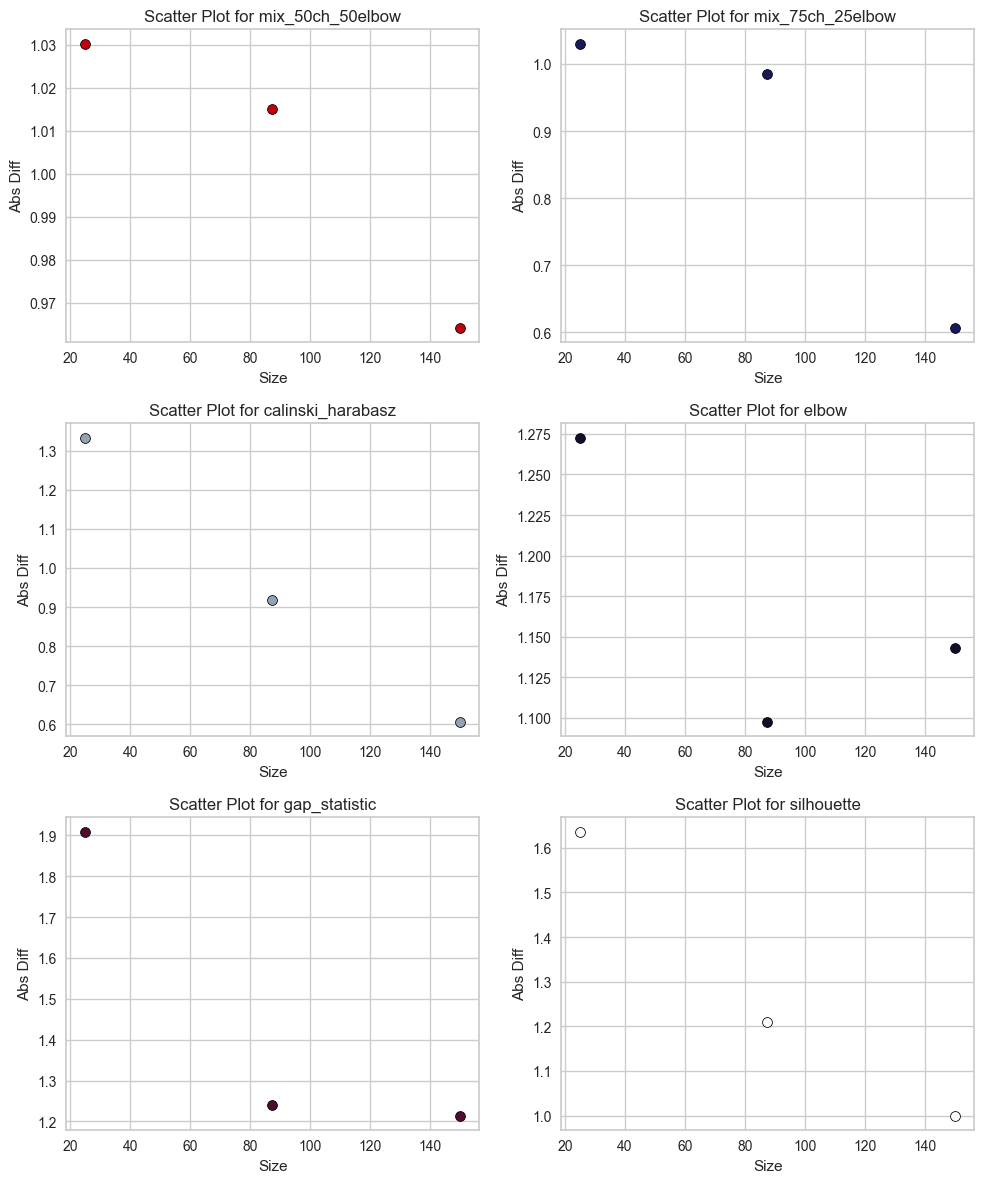

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#todo dlete this , I think
# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'assortativity', and 'abs_diff' columns

# Define the custom palette
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex))
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['size'].min()-100, df_all_results['size'].max() + 100, 100)

for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['size_bin'] = pd.cut(subset['size'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('size_bin').agg({'size': 'mean', 'abs_diff': 'mean'}).reset_index()
    sns.scatterplot(x='size', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Size')
    ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

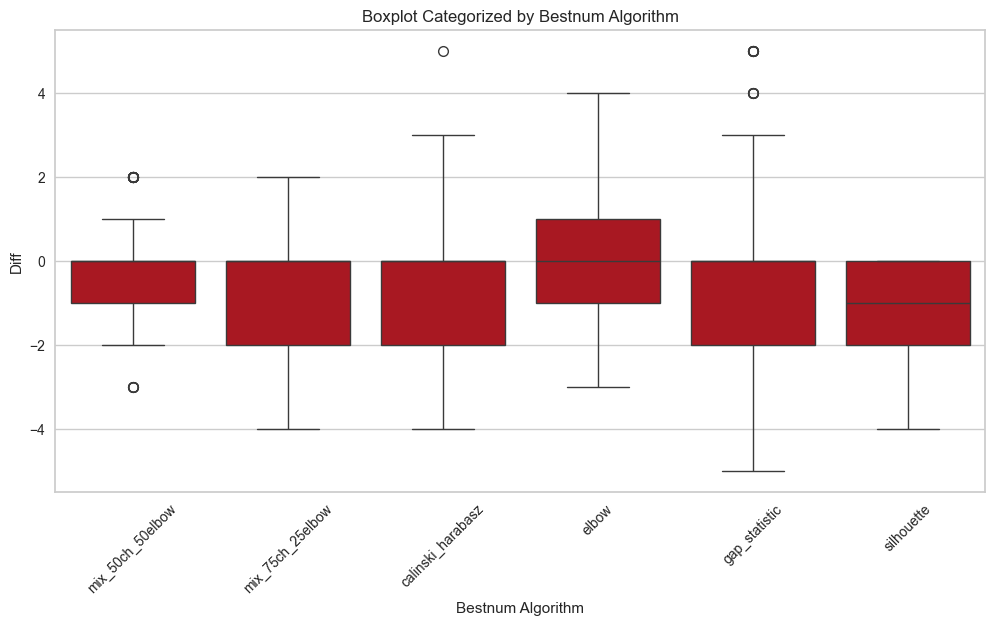

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bestnum_algo', y='diff', data=df_all_results)

# Customize the plot
plt.title('Boxplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Diff')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

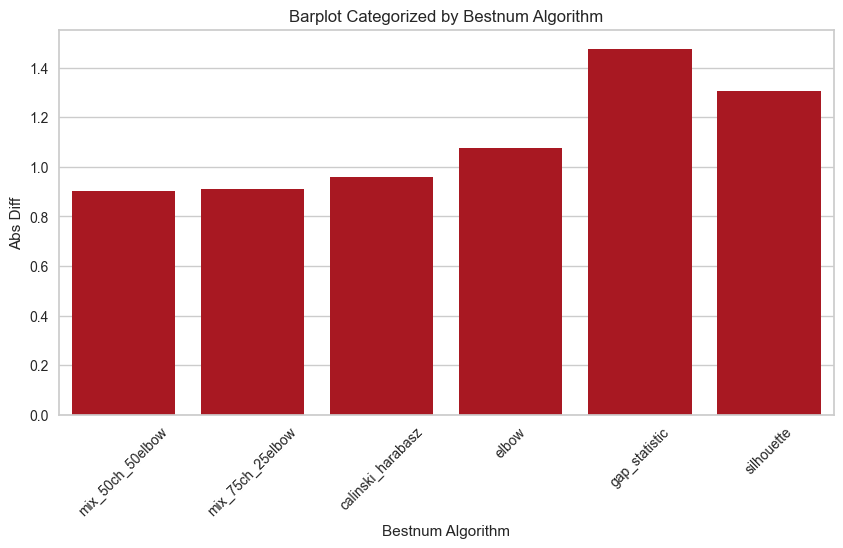

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(x='bestnum_algo', y='abs_diff', data=df_all_results, estimator=np.mean, ci=False)

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Bestnum Algorithm')
plt.ylabel('Abs Diff')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

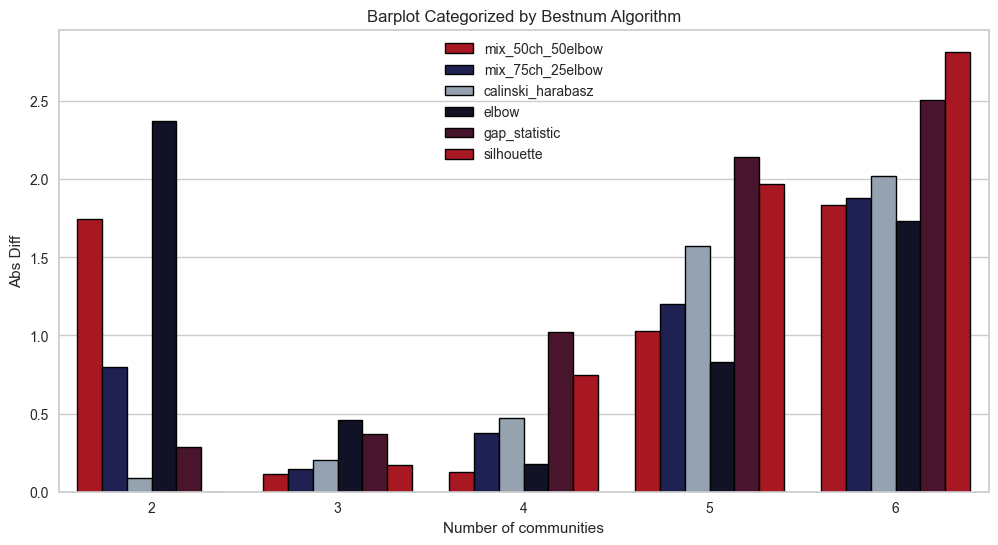

In [51]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='no_communities', y='abs_diff', hue='bestnum_algo', data=df_all_results, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None)
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm')
plt.xlabel('Number of communities')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(handles=handles, labels=labels)

# Show the plot
plt.show()

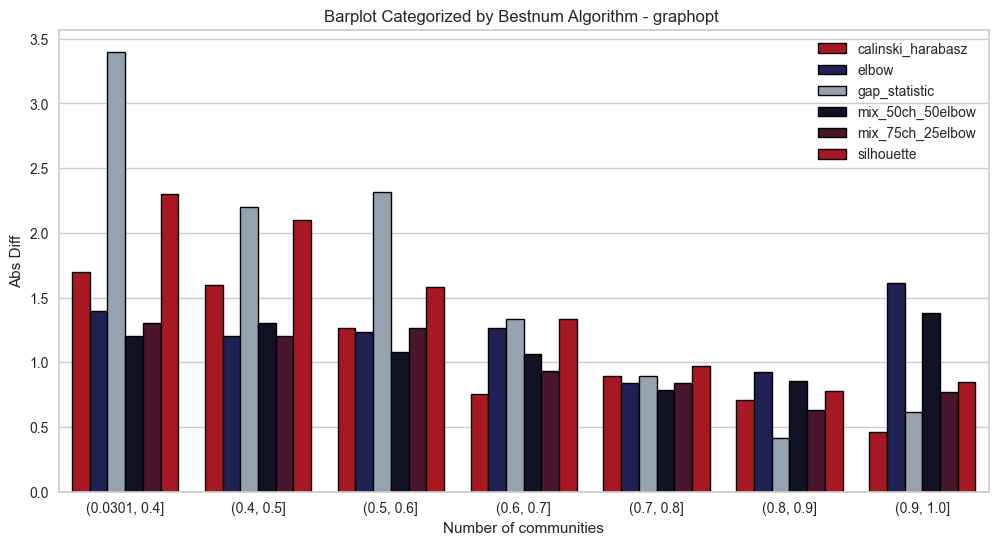

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'abs_diff', and 'assortativity' columns
subset = df_all_results.copy(deep=True)
# Define the custom palette
palette_dict = dict(zip(subset['bestnum_algo'].unique(), mammalian_sighting_reflex))

bins = np.arange(0.4, subset['assortativity'].max() + 0.1, 0.1)
bins = np.insert(bins, 0, subset['assortativity'].min())  # Ensure the first bin starts from the minimum value

subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)

binned_data = subset.groupby(['assortativity_bin', 'bestnum_algo']).agg({'abs_diff': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='assortativity_bin', y='abs_diff', hue='bestnum_algo', data=binned_data, palette=mammalian_sighting_reflex, ci=None)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

# Customize the plot
plt.title('Barplot Categorized by Bestnum Algorithm - graphopt ')
plt.xlabel('Number of communities')
plt.ylabel('Abs Diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_edgecolor('black')
    handle.set_linewidth(1)  # Optional: set the width of the edge
ax.legend(handles=handles, labels=labels)

# Show the plot
plt.show()

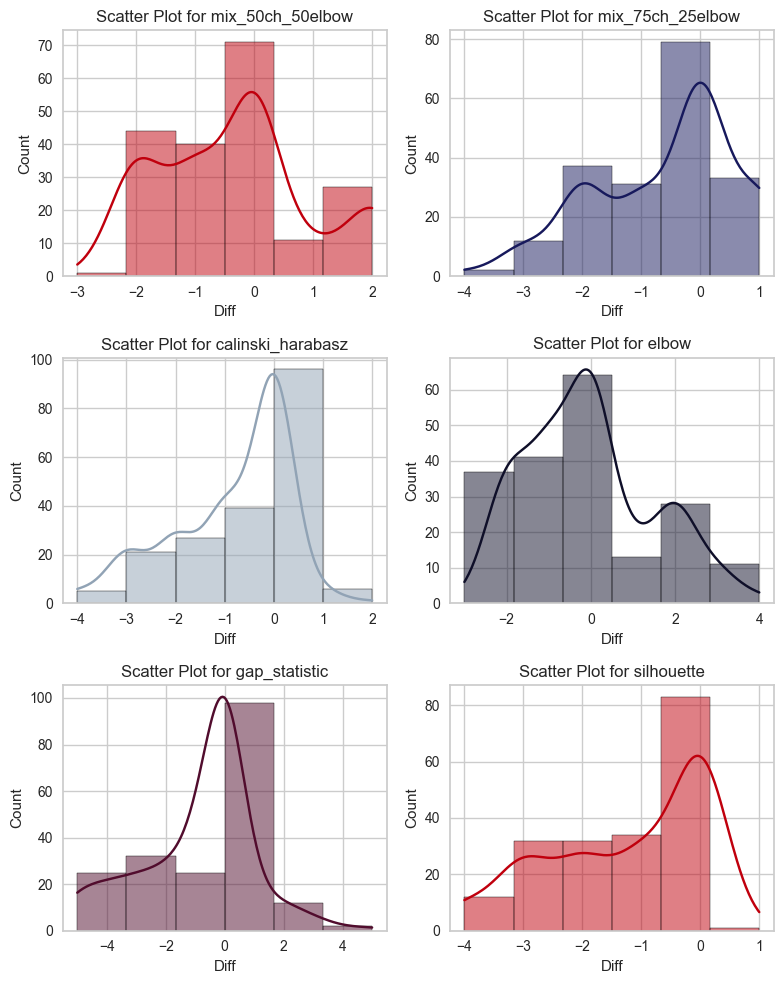

In [62]:
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), ['#C0000D','#17195C','#91A3B5','#0F0F29','#510C2D','#C0000D']))
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    sns.histplot(data=subset, x='diff', bins=6, kde=True, ax=ax, color=palette_dict[algo])
    # Customize the subplot
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Diff')
    # ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

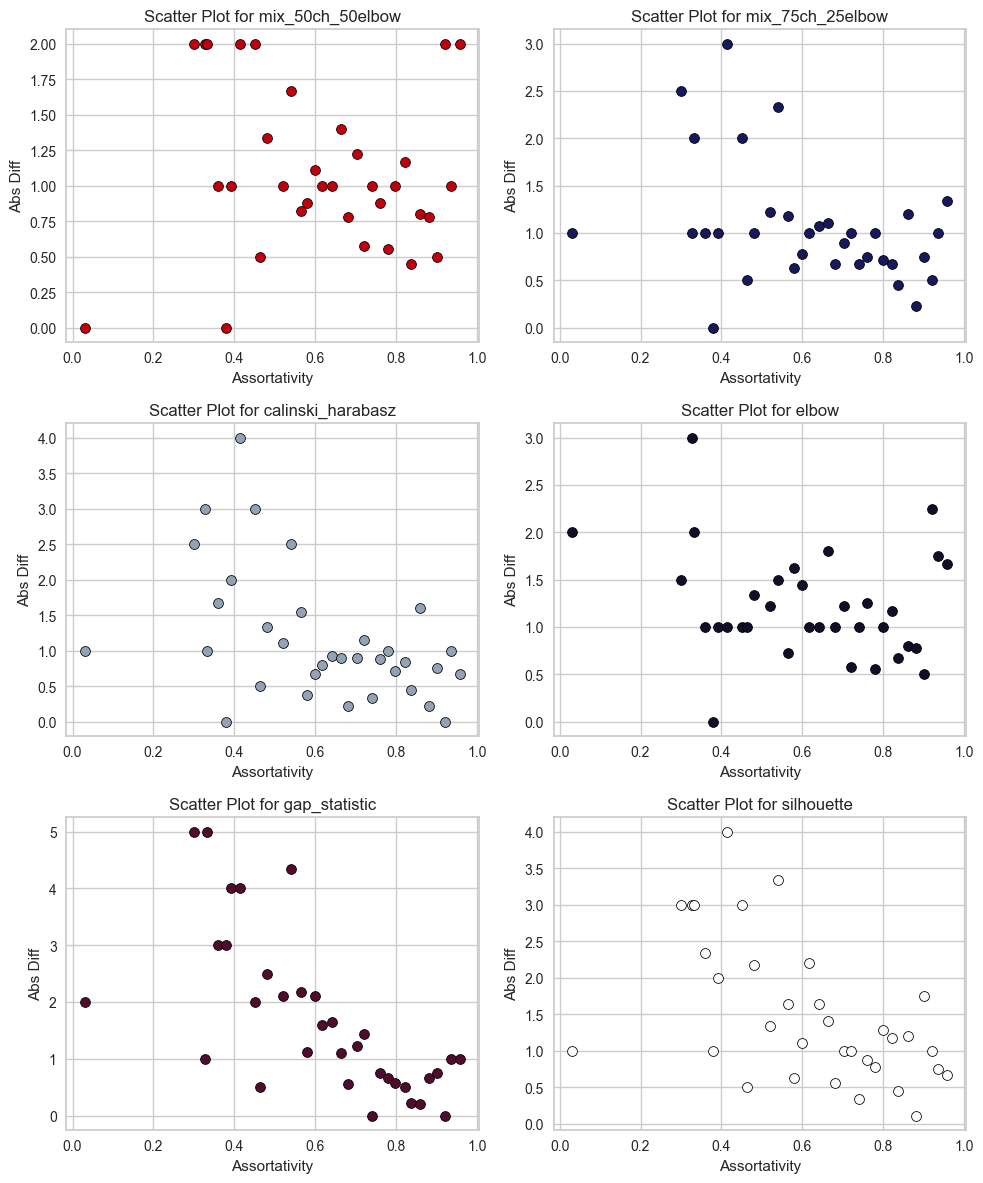

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'assortativity', and 'abs_diff' columns

# Define the custom palette
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex))
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()
unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['assortativity'].min(), df_all_results['assortativity'].max() + 0.02, 0.02)

for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('assortativity_bin').agg({'assortativity': 'mean', 'abs_diff': 'mean'}).reset_index()
    sns.scatterplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Abs Diff')

plt.tight_layout()
plt.show()

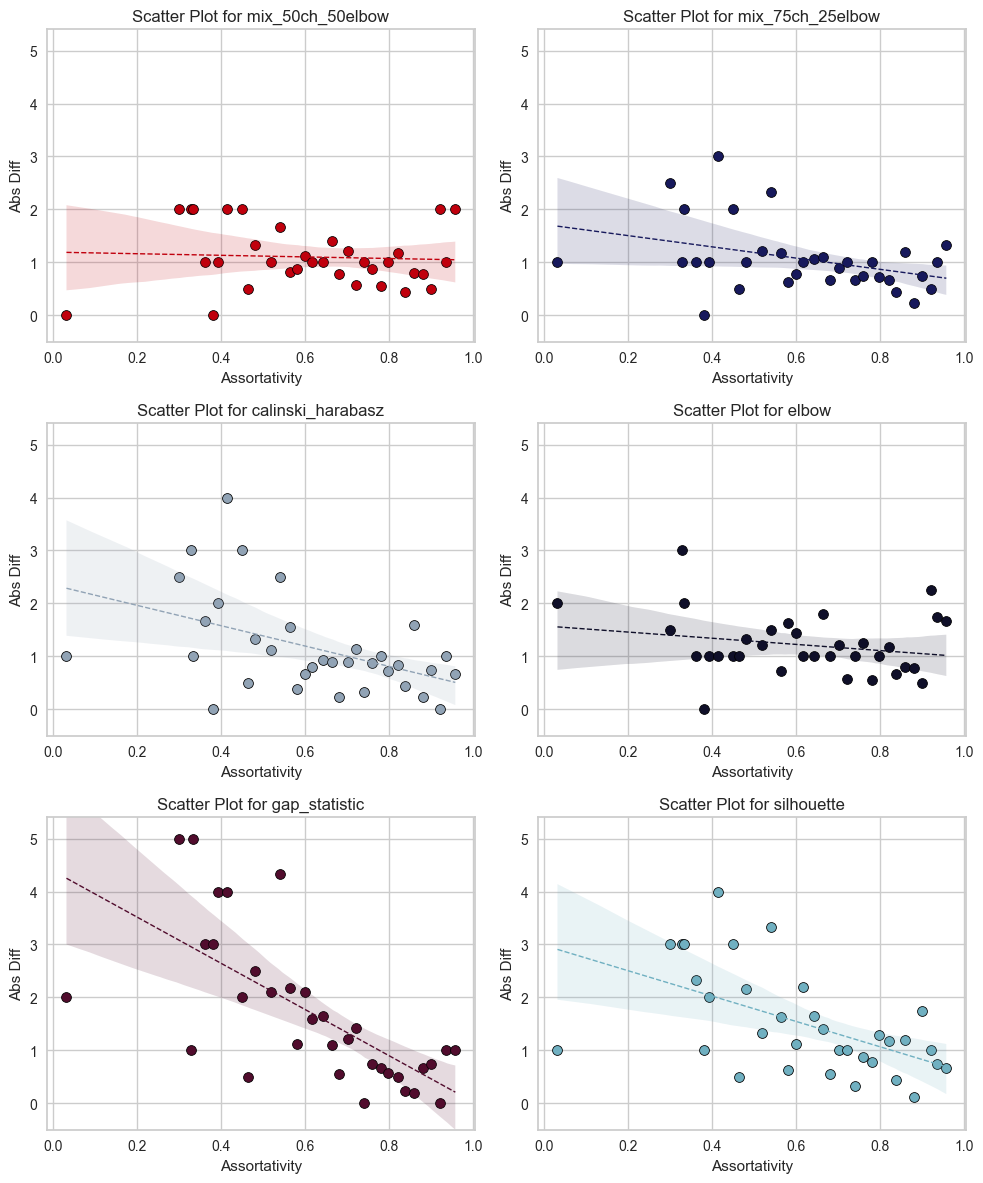

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_all_results is already loaded and contains the 'bestnum_algo', 'assortativity', and 'abs_diff' columns
palette_dict = dict(zip(df_all_results['bestnum_algo'].unique(), mammalian_sighting_reflex[:5]+['#70B0C1']))
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes = axes.flatten()

unique_algos = df_all_results['bestnum_algo'].unique()
bins = np.arange(df_all_results['assortativity'].min(), df_all_results['assortativity'].max() + 0.02, 0.02)
y_min, y_max = float('inf'), float('-inf')

# Iterate over each subplot and unique bestnum_algo
for ax, algo in zip(axes, unique_algos):
    # Filter data for the current bestnum_algo
    subset = df_all_results[df_all_results['bestnum_algo'] == algo]
    subset['assortativity_bin'] = pd.cut(subset['assortativity'], bins=bins, include_lowest=True)
    binned_data = subset.groupby('assortativity_bin').agg({'assortativity': 'mean', 'abs_diff': 'mean'}).reset_index()
    y_min = -0.5
    y_max = max(y_max, binned_data['abs_diff'].max())+.2
    sns.scatterplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, color=palette_dict[algo], s=50, edgecolor='black')
    sns.regplot(x='assortativity', y='abs_diff', data=binned_data, ax=ax, scatter=False, color=palette_dict[algo], line_kws={"linestyle": "--", "linewidth": 1})
    ax.set_title(f'Scatter Plot for {algo}')
    ax.set_xlabel('Assortativity')
    ax.set_ylabel('Abs Diff')

# Set the same y-axis limits for all subplots
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

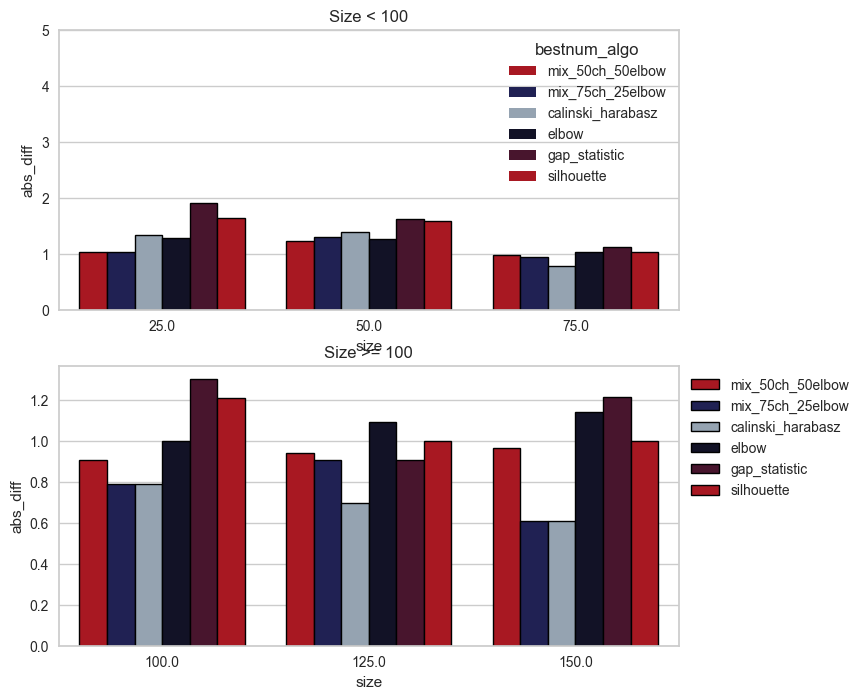

In [58]:
# plt.figure(figsize=(10, 4))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

subset = df_all_results[df_all_results['size'] <= 75]
sns.barplot(x='size', y='abs_diff', hue='bestnum_algo', data=subset, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None,ax=ax1)
general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge
for patch in ax1.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

# sns.pointplot(x='no_communities', y='abs_diff', data=general_avg, color=mammalian_sighting_reflex[0], markers='o', linestyles='', ax=ax1)
# Customize the plot
ax1.set_title('Size < 100')
ax1.set_ylim(0, 5)

# plt.xlabel('Bestnum Algorithm')
plt.ylabel('abs diff')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

subset = df_all_results[df_all_results['size'] > 75]
sns.barplot(x='size', y='abs_diff', hue='bestnum_algo', data=subset, estimator=np.mean, palette=mammalian_sighting_reflex, ci=None, ax=ax2)
general_avg = subset.groupby('layout_name')['abs_diff'].mean().reset_index()
# sns.pointplot(x='no_communities', y='abs_diff', data=general_avg, color=mammalian_sighting_reflex[0], markers='o', linestyles='',ax=ax2)
# Customize the plot
for patch in ax2.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)  # Optional: set the width of the edge

ax2.set_title('Size >= 100')
# plt.xlabel('Bestnum Algorithm')
plt.ylabel('abs_diff')
# ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()
